In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pylab as plt
import matplotlib.animation as animation
%matplotlib notebook

In [2]:
J = 1.0
H = np.array([0.0, 0.0, 1.0])

In [3]:
I=2; J=1
vec_q = 2*np.pi*np.array([I, J]) / np.array([3, 3])
vec_q = -2*np.pi*np.ones(2) + 2*vec_q
vec_q

array([ 2.0943951, -2.0943951])

In [9]:
def spin_interaction(sconfig, i, j):
    idx = i+1 if i+1 < sconfig.shape[0] else 0
    jdx = j+1 if j+1 < sconfig.shape[1] else 0
    E = -J*np.dot(sconfig[i][j], (sconfig[idx][j] + sconfig[i][jdx] + sconfig[i-1][j] + sconfig[i][j-1]))
    E -= np.dot(H, (sconfig[idx][j] + sconfig[i][jdx] + sconfig[i-1][j] + sconfig[i][j-1]))
    return E

def energy(sconfig):
    nrj = 0
    S = np.zeros(3)
    for j in range(sconfig.shape[0]):
        for i in range(sconfig.shape[1]):
            idx = i+1 if i+1 < sconfig.shape[0] else 0
            jdx = j+1 if j+1 < sconfig.shape[1] else 0
            S += sconfig[i][j]
            nrj -= J*np.dot(sconfig[i][j], (sconfig[idx][j] + sconfig[i][jdx]))
    nrj -= np.dot(H,S)
    return nrj

def magnetization(sconfig):
    return np.sum(sconfig) / float(sconfig.shape[0]*sconfig.shape[1])

def metropolis(sconfig, temp):
    mat = sconfig.copy()
    for i in range(sconfig.shape[0]):
        for j in range(sconfig.shape[1]):
            randvec = np.random.rand(1,3)[0]*((-1)**np.random.randint(0, 2))/10.0
            e0 = spin_interaction(mat, i, j)
            mat[i][j] += randvec
            mat[j][i] /= np.linalg.norm(mat[j][i])
            e1 = spin_interaction(mat, i, j)
            if (e1-e0) < 0:
                pass
            else:
                if np.random.rand() <= np.exp(-(e1-e0)/temp):
                    mat[j][i] -= randvec
    return mat

def spin_structure_factor(lattices, axis):
    structures = list()
    for k in tqdm(range(len(lattices))):
        structure = np.zeros((lattices[0].shape[0],lattices[0].shape[1]))
        xsum = ysum = zsum = 0.0
        # for each point in lattice
        for I in range(lattices[0].shape[0]):
            for J in range(lattices[0].shape[1]):
                vec_q = 2*np.pi*np.array([I, J]) / np.array([lattices[0].shape[0], lattices[0].shape[1]])
                # summurize by all lattice
                for i in range(lattices[0].shape[0]):
                    for j in range(lattices[0].shape[1]):
                        xsum += lattices[k][i][j][0] * np.real(np.exp(-1j*np.dot(vec_q, np.array([I-i,J-j]))))
                        ysum += lattices[k][i][j][1] * np.real(np.exp(-1j*np.dot(vec_q, np.array([I-i,J-j]))))
                        zsum += lattices[k][i][j][2] * np.real(np.exp(-1j*np.dot(vec_q, np.array([I-i,J-j]))))
                if axis == 'xy':
                    structure[I][J] = xsum**2 + ysum**2
                elif axis == 'z':
                    structure[I][J] = zsum**2
        structures.append(structure)
    spin_structure = np.mean(structures, axis=0)
    return spin_structure
    
    
def run(sconfig, temp, max_epoch, verbose=False):
    mags = list()
    energies = list()
    mean_energy = 0
    mean_mag = 0
    lattices = list()
    new = metropolis(sconfig, temp)
    for t in tqdm(xrange(max_epoch), disable = not verbose):
        a = metropolis(new, temp)
        mags.append(magnetization(a))
        energies.append(energy(a))
        new = a
        lattices.append(new)
    return lattices, energies, mags

In [17]:
#init_spins = np.random.rand(8,8,3)
init_spins = np.ones((64, 64, 3))

temperatures = np.arange(0.5, 5, 0.2)

In [18]:
lattices, E, M = run(init_spins, temp=2.0, max_epoch=1000, verbose=True)

100%|██████████| 1000/1000 [04:13<00:00,  3.95it/s]


In [19]:
xy_factor = spin_structure_factor(lattices, axis='xy')

  0%|          | 4/1000 [33:37<139:32:44, 504.38s/it]

KeyboardInterrupt: 

In [13]:
xy_factor[0]

array([ 2733.7107704 ,  2711.13386029,  2751.10544502,  2754.28245223,
        2763.5968693 ,  2801.3670992 ,  2842.90889341,  2873.93012203])

<IPython.core.display.Javascript object>


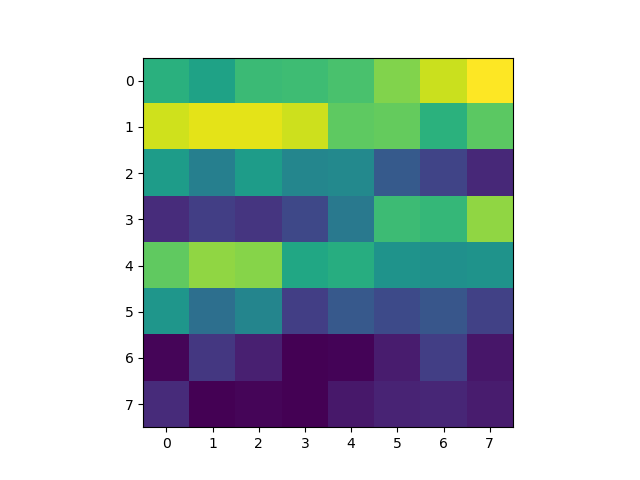

In [14]:
plt.imshow(xy_factor)
plt.show()

In [15]:
z_factor = spin_structure_factor(lattices, axis='z')

100%|██████████| 100/100 [00:13<00:00,  7.42it/s]


<IPython.core.display.Javascript object>


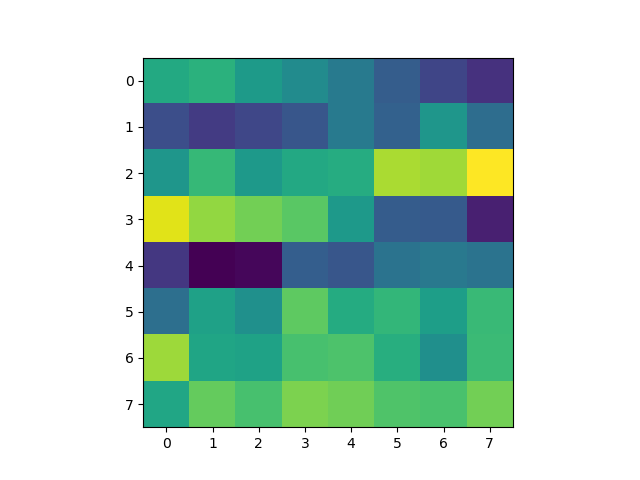

In [16]:
plt.imshow(z_factor)
plt.show()

In [ ]:
plt.figure(figsize=(9,5))
plt.subplot(121)
plt.plot(np.arange(len(M)), M, 'g--')
plt.title('Convergence of magnetization')
plt.xlabel('Time')
plt.ylabel('Mag')

plt.subplot(122)
plt.plot(np.arange(len(E)), E, 'r--')
plt.title('Convergence of energy')
plt.xlabel('Time')
plt.ylabel('Energy')

plt.show()

In [ ]:
np.zeros(lattices[0].shape).shape

In [ ]:
lattices[0].shape

In [ ]:
np.real(np.exp(np.pi*1j/8))

In [ ]:
lattices[0][0][0][0]*np.real(np.exp(np.pi*1j/8))